In [14]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import warnings

import pickle
import time

import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics  import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans


import logging

from scipy.sparse import hstack

warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline

In [15]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
np.random.seed(seed=11)

In [17]:
import os
os.getcwd()

'C:\\Users\\Sai Priya\\Desktop\\project\\pythoncodes'

In [18]:
os.chdir("C:/Users/Sai Priya/Desktop/project/datasets")

In [19]:
df = pd.read_csv("Questions.csv", encoding="ISO-8859-1")

In [20]:
df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [21]:
tags = pd.read_csv("Tags.csv", encoding="ISO-8859-1", dtype={'Tag': str})

In [22]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [23]:
tags['Tag'] = tags['Tag'].astype(str)

In [24]:
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))

In [25]:
grouped_tags.head(5)

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [26]:
grouped_tags.reset_index()

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [27]:
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})

In [28]:
df.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

In [29]:
df = df.merge(grouped_tags_final, on='Id')

In [30]:

new_df = df[df['Score']>5]

In [31]:

print('Dupplicate entries: {}'.format(new_df.duplicated().sum()))
new_df.drop_duplicates(inplace = True)

Dupplicate entries: 0


In [32]:

new_df.drop(columns=['Id', 'Score'], inplace=True)

In [33]:

new_df.head(5)

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [34]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())

In [35]:
all_tags = [item for sublist in new_df['Tags'].values for item in sublist]

In [36]:
len(all_tags)

224129

In [37]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

14883

In [38]:
flat_list = [item for sublist in new_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [39]:
tags_features

['c#',
 'java',
 'javascript',
 'android',
 'python',
 'c++',
 'php',
 'jquery',
 '.net',
 'ios',
 'html',
 'css',
 'c',
 'iphone',
 'objective-c',
 'ruby-on-rails',
 'sql',
 'asp.net',
 'mysql',
 'ruby',
 'r',
 'git',
 'asp.net-mvc',
 'linux',
 'sql-server',
 'node.js',
 'angularjs',
 'django',
 'performance',
 'algorithm',
 'string',
 'xcode',
 'arrays',
 'wpf',
 'eclipse',
 'haskell',
 'windows',
 'scala',
 'multithreading',
 'json',
 'c++11',
 'regex',
 'visual-studio',
 'html5',
 'osx',
 'swift',
 'database',
 'unit-testing',
 'spring',
 'xml',
 'bash',
 'ajax',
 'delphi',
 'cocoa-touch',
 'ruby-on-rails-3',
 'visual-studio-2010',
 'linq',
 'debugging',
 'generics',
 'perl',
 'entity-framework',
 'mongodb',
 'winforms',
 'cocoa',
 'security',
 'postgresql',
 'css3',
 'templates',
 'twitter-bootstrap',
 'shell',
 'list',
 'google-chrome',
 'vim',
 'oop',
 'image',
 'hibernate',
 'gcc',
 'asp.net-mvc-3',
 'facebook',
 'oracle',
 'rest',
 'maven',
 'http',
 'exception',
 'tsql',
 'ma

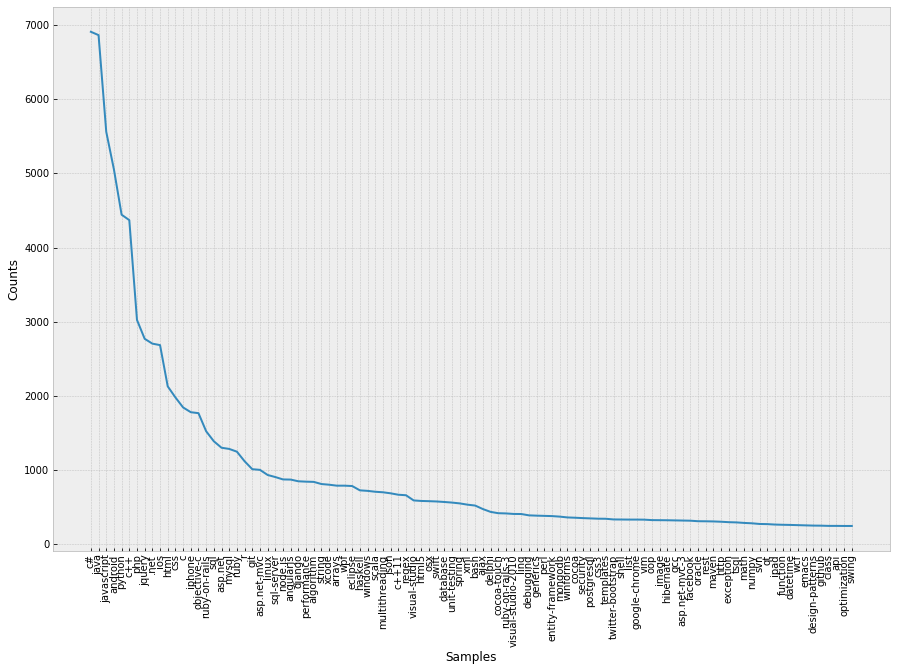

In [40]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)


In [41]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [42]:

new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [43]:

new_df.shape

(72950, 3)

In [44]:
new_df.dropna(subset=['Tags'], inplace=True)

In [45]:
new_df.shape

(63167, 3)

In [46]:
new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x).get_text())

In [47]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [48]:
token=ToktokTokenizer()

In [49]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [51]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [52]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [53]:
new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x))

In [54]:
new_df['Body'][2]

'Has anyone got experience creating SQL-based ASPNET site-map providers I ve got the default XML file websitemap working properly with my Menu and SiteMapPath controls but I ll need a way for the users of my site to create and modify pages dynamically I need to tie page viewing permissions into the standard ASPNET membership system as well'

In [55]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [56]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [57]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sai
[nltk_data]     Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x))

In [59]:
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: clean_punct(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x))

In [60]:
no_topics = 20

In [61]:
text=new_df['Body']

In [62]:
vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=1000)

In [63]:
TF_IDF_matrix = vectorizer_train.fit_transform(text)

In [64]:
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)

In [65]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        

no_top_words = 10
display_topics(lda, vectorizer_train.get_feature_names(), no_top_words)

--------------------------------------------
Topic 0:
android file error project use run try get app work
--------------------------------------------
--------------------------------------------
Topic 1:
password php email echo file login session gem path command
--------------------------------------------
--------------------------------------------
Topic 2:
import python file module line print mac buffer filename modules
--------------------------------------------
--------------------------------------------
Topic 3:
use would like know find app way need one is
--------------------------------------------
--------------------------------------------
Topic 4:
int std const value return use function 10 00 data
--------------------------------------------
--------------------------------------------
Topic 5:
public class void new string return object method int static
--------------------------------------------
--------------------------------------------
Topic 6:
string 124 array l

In [66]:
X1 = new_df['Body']
X2 = new_df['Title']
y = new_df['Tags']

In [67]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [68]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [69]:
X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)

In [70]:
X_tfidf = hstack([X1_tfidf,X2_tfidf])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

In [72]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [73]:
model = Sequential()

model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 1000))

model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


In [74]:
X_train.shape

(50533, 2000)

In [75]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [76]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [77]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 2.6642016629352385
Hamming loss: 3.005382301725503
---
Clf:  SGDClassifier
Jacard score: 46.93472639966229
Hamming loss: 0.9654899477600126
---
Clf:  LogisticRegression
Jacard score: 47.70935570682286
Hamming loss: 0.9819534589203736
---
Clf:  MultinomialNB
Jacard score: 39.75167160421236
Hamming loss: 1.1797530473325946
---
Clf:  LinearSVC
Jacard score: 51.67814363358134
Hamming loss: 0.9671521291752414
---
Clf:  Perceptron
Jacard score: 46.10453399870845
Hamming loss: 1.5090232705398132
---
Clf:  PassiveAggressiveClassifier
Jacard score: 47.95919175015265
Hamming loss: 1.2991135032452112
---


In [78]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)


Clf:  MLPClassifier
Jacard score: 47.84792736154142
Hamming loss: 1.3517492480607884
---


In [79]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
 
y_pred = rfc.predict(X_test)
 
print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 44.04081578808506
Hamming loss: 1.0279404780750356
---


In [82]:
param_grid = {'estimator__C':[1,10,100,1000]}

In [83]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... estimator__C=1, score=51.469, total=  25.3s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s remaining:    0.0s


[CV] ..................... estimator__C=1, score=51.520, total=  24.5s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.7s remaining:    0.0s


[CV] ..................... estimator__C=1, score=50.782, total=  24.3s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] ..................... estimator__C=1, score=50.359, total=  24.2s
[CV] estimator__C=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV] ..................... estimator__C=1, score=51.070, total=  24.0s
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min remaining:    0.0s


[CV] .................... estimator__C=10, score=47.685, total= 1.2min
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.2min remaining:    0.0s


[CV] .................... estimator__C=10, score=47.763, total= 1.2min
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.4min remaining:    0.0s


[CV] .................... estimator__C=10, score=46.990, total= 1.2min
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.6min remaining:    0.0s


[CV] .................... estimator__C=10, score=46.663, total= 1.2min
[CV] estimator__C=10 .................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.8min remaining:    0.0s


[CV] .................... estimator__C=10, score=47.101, total= 1.2min
[CV] estimator__C=100 ................................................
[CV] ................... estimator__C=100, score=44.423, total= 1.8min
[CV] estimator__C=100 ................................................
[CV] ................... estimator__C=100, score=44.052, total= 1.8min
[CV] estimator__C=100 ................................................
[CV] ................... estimator__C=100, score=43.942, total= 1.8min
[CV] estimator__C=100 ................................................
[CV] ................... estimator__C=100, score=43.300, total= 1.8min
[CV] estimator__C=100 ................................................
[CV] ................... estimator__C=100, score=44.037, total= 1.8min
[CV] estimator__C=1000 ...............................................
[CV] .................. estimator__C=1000, score=42.599, total= 2.0min
[CV] estimator__C=1000 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 27.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                               class_weight=None,
                                                               dual=True,
                                                               fit_intercept=True,
                                                               intercept_scaling=1,
                                                               loss='squared_hinge',
                                                               max_iter=1000,
                                                               multi_class='ovr',
                                                               penalty='l2',
                                                               random_state=None,
                                                               tol=0.0001,
                                                               verbose=0),
                 

In [84]:
CV_svc.best_params_

{'estimator__C': 1}

In [85]:
best_model = CV_svc.best_estimator_

In [86]:
y_pred = best_model.predict(X_test)
 
print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score: 51.67814363358134
Hamming loss: 0.9671521291752414
---


In [89]:
r=model.predict(vectorizer_train.transform(["c++"]))

In [90]:
r=r>0.5
r

array([[False]])